<a href="https://colab.research.google.com/github/Fredrick-Sam-Nilesh/datascience/blob/main/Copy_of_App_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
linkedin_data = pd.read_csv(r"/content/drive/MyDrive/linkedin-reviews.csv")

In [ ]:
print(linkedin_data)

                                                Review  Rating
0    Does absolutely nothing for a LinkedIn beginne...       1
1                              Force close(galaxy tab)       1
2    Slow and it tries to upload your contacts with...       1
3    Add ability to customize the profile and move ...       4
4    Good app, but it's a pain that it's not possib...       4
..                                                 ...     ...
697  Can't trust, Going to uninstall just for that ...       1
698  It really gets me linked in with my friends. H...       5
699  It lacks most of what makes the other social n...       4
700  Really disappointed in the new version. Seems ...       2
701  One of the best looking and well designed apps...       5

[702 rows x 2 columns]


In [ ]:
linkedin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


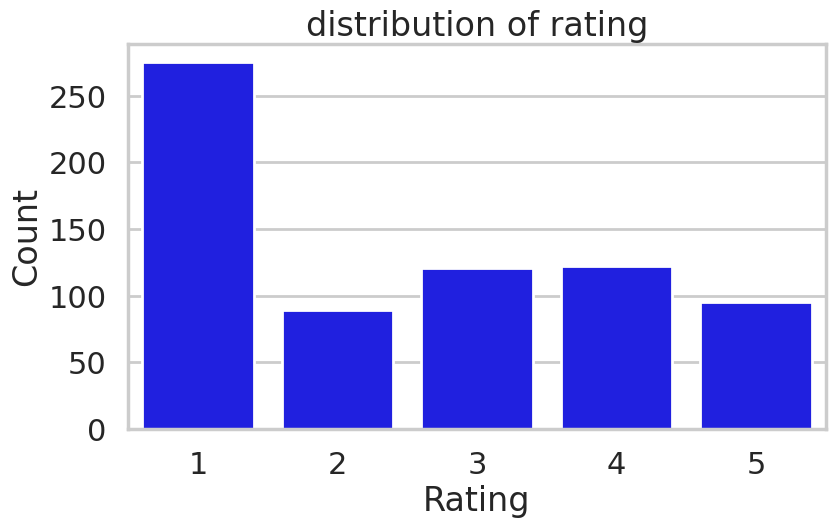

In [ ]:
# plotting distribution of rating
sns.set_style("whitegrid")
plt.figure(figsize =(9,5))
sns.countplot(data = linkedin_data, x = "Rating")
plt.title("distribution of rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

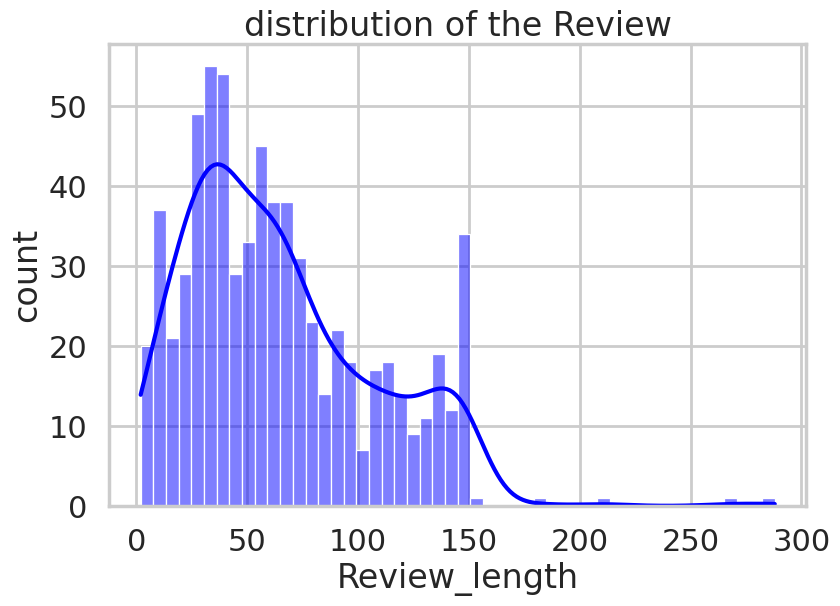

In [ ]:
# Now lets see the distribution of each reviews
linkedin_data["Review_Length"]=linkedin_data["Review"].apply(len)
#plotting the distribution of the review length
plt.figure(figsize = (9,6))
sns.histplot(linkedin_data["Review_Length"],bins=50,kde=True)
plt.title("distribution of the Review")
plt.xlabel("Review_length")
plt.ylabel("count")
plt.show()


In [ ]:
#Let’s proceed to (LABEL) the dataset using [TextBlob] for sentiment analysis:

from textblob import TextBlob
def textblob_sentiment_analysis(review):
  #anlyse the sentiment of the review
  sentiment = TextBlob(review).sentiment
  # classifying based on polarity
  if sentiment.polarity > 0.1:
    return "Positive"
  elif sentiment.polarity < -0.1:
      return "Negative"
  else:
    return "Neutral"

# Applying Textblob sentiment analysis to the review
linkedin_data["sentiment"] = linkedin_data["Review"].apply(textblob_sentiment_analysis)

# Display head
print(linkedin_data.head())

                                              Review  Rating  Review_Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


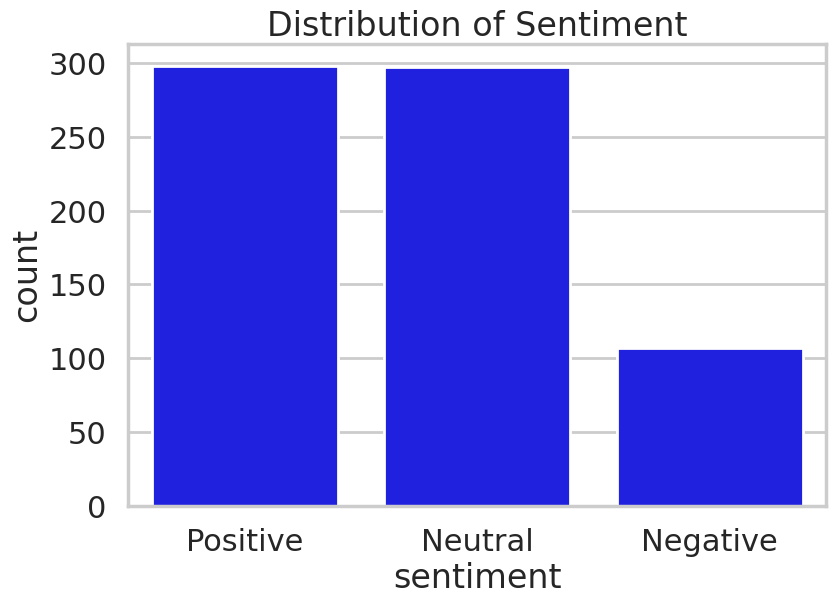

In [ ]:
#----Now let analyse-------(APP REVIEW SENTIMENT)--------
# Analyzing the distribution of sentiment

sentiment_distribution = linkedin_data["sentiment"].value_counts()

# Plotting the distribution of sentiment
plt.figure(figsize=(9,6))
sns.barplot(x=sentiment_distribution.index,y=sentiment_distribution.values)
plt.title("Distribution of Sentiment")
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()



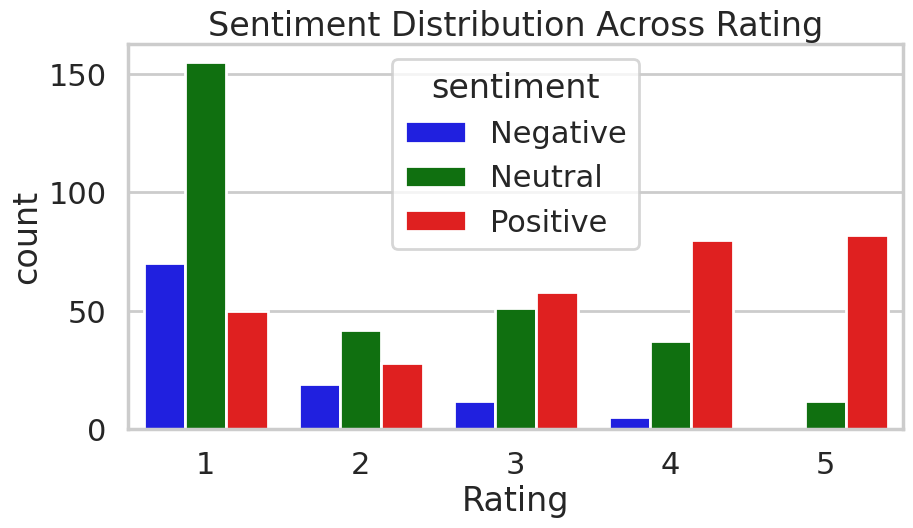

In [ ]:
# Next, we’ll explore the relationship between the sentiments and the ratings.
# This analysis can help us understand whether there is a correlation between
#the sentiment of the text and the numerical rating

plt.figure(figsize = (10,5))
sns.countplot(data=linkedin_data,x = 'Rating',hue='sentiment')
plt.title('Sentiment Distribution Across Rating')
plt.xlabel('Rating')
plt.ylabel('count')
plt.legend(title='sentiment')
plt.show()

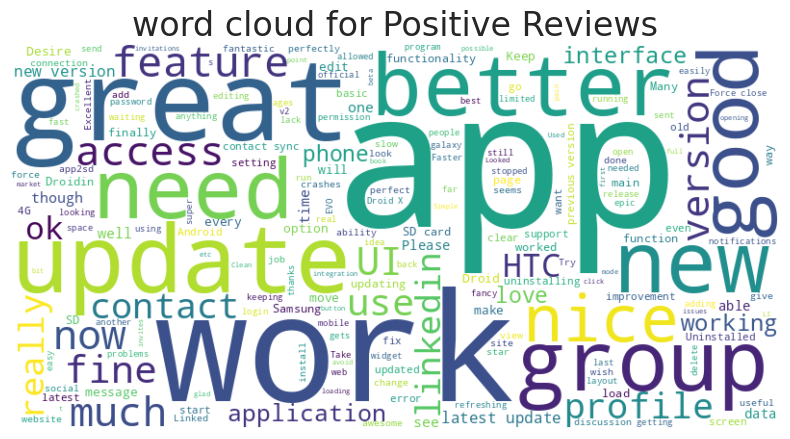

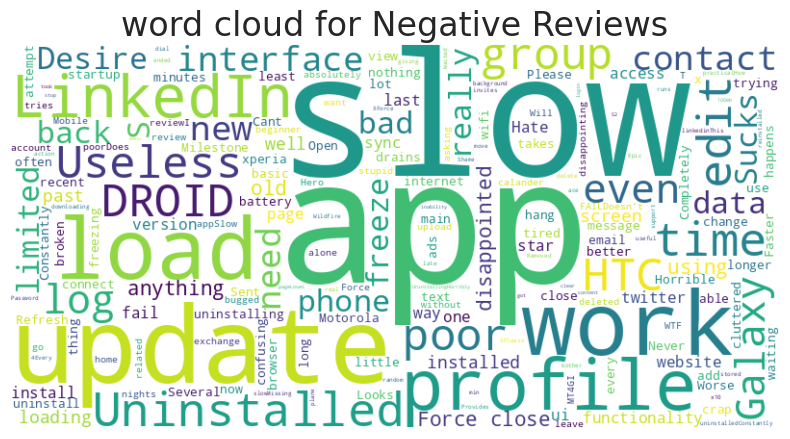

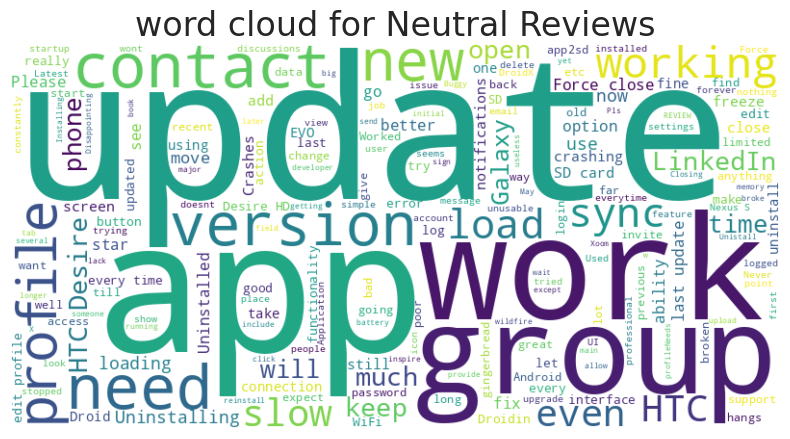

In [ ]:
#Now, let’s perform a text analysis to identify common words or themes within each sentiment category.
#It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

from wordcloud import WordCloud
    #Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
     text=''.join(review for review in linkedin_data[linkedin_data['sentiment']==sentiment]['Review'])
     wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
     plt.figure(figsize=(10,5))
     plt.imshow(wordcloud,interpolation='bilinear')
     plt.title(f'word cloud for {sentiment} Reviews')
     plt.axis("off")
     plt.show()

  #generate word cloud for each sentiment

for sentiment in ['Positive','Negative','Neutral']:
     generate_word_cloud(sentiment)
